In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 6.6MB/s 
     |████████████████████████████████| 15.3MB 244kB/s 
     |████████████████████████████████| 6.5MB 31.3MB/s 


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from geopandas import * 
from geopy import *
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving owid-covid-data (1).csv to owid-covid-data (1).csv


In [ ]:
df=pd.read_csv("owid-covid-data (1).csv")
print(df)

      iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83441      ZWE    Africa  ...           61.49                   0.571
83442      ZWE    Africa  ...           61.49                   0.571
83443      ZWE    Africa  ...           61.49                   0.571
83444      ZWE    Africa  ...           61.49                   0.571
83445      ZWE    Africa  ...           61.49                   0.571

[83446 rows x 59 columns]


In [ ]:
df.isnull().sum().sum()

1986457

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                 4039
location                                     0
date                                         0
total_cases                               1966
new_cases                                 1968
new_cases_smoothed                        2969
total_deaths                             11566
new_deaths                               11408
new_deaths_smoothed                       2969
total_cases_per_million                   2407
new_cases_per_million                     2409
new_cases_smoothed_per_million            3405
total_deaths_per_million                 11994
new_deaths_per_million                   11836
new_deaths_smoothed_per_million           3405
reproduction_rate                        16142
icu_patients                             74691
icu_patients_per_million                 74691
hosp_patients                            72877
hosp_patients_per_million                72877
weekly_icu_ad

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.148000e+04,81478.000000,80477.000000,7.188000e+04,72038.000000,80477.000000,81039.000000,81037.000000,80041.000000,71452.000000,71610.000000,80041.000000,67304.000000,8755.000000,8755.000000,10569.000000,10569.000000,774.000000,774.000000,1273.000000,1273.000000,3.822200e+04,3.793600e+04,37936.000000,38222.000000,4.379500e+04,43795.000000,42065.000000,41472.000000,8.420000e+03,7.741000e+03,5.619000e+03,7.119000e+03,1.359200e+04,8420.000000,7741.000000,5619.000000,13592.000000,70841.000000,8.290900e+04,77673.000000,75208.000000,74348.000000,74786.000000,75526.000000,51448.000000,76129.000000,77219.000000,59667.000000,58786.000000,38247.000000,69494.000000,79191.000000,76018.000000
mean,7.944253e+05,5665.917696,5638.146652,2.237170e+04,137.250187,121.325515,9659.983694,73.434208,73.352817,217.486996,1.492427,1.317857,1.021112,1046.838949,25.494331,4810.629009,172.358334,278.099968,20.943478,3982.049980,115.321602,4.246399e+04,5.762633e+06,218.224842,1.824243,4.061193e+04,1.723487,0.088854,160.648252,1.303441e+07,8.318772e+06,4.196373e+06,4.029116e+05,2.125433e+05,12.168466,8.605526,4.682029,2737.559888,58.765751,1.287787e+08,347.115077,30.526447,8.775827,5.559056,19138.526517,13.337626,257.690226,7.815363,10.518753,32.653904,50.929045,3.030001,73.164068,0.727213
std,5.504430e+06,35115.905723,34390.407640,1.320955e+05,748.147347,683.793165,18616.193872,175.290903,148.570593,382.372053,3.974604,2.919255,0.358283,3003.604982,27.601050,12472.661725,214.860244,584.497115,37.211559,11674.894716,231.773618,1.582982e+05,2.625610e+07,471.539438,5.245713,1.448908e+05,4.284941,0.097755,871.596326,5.829858e+07,3.414805e+07,1.595188e+07,1.580640e+06,1.069931e+06,20.641731,13.212941,9.268994,4740.836757,21.700441,6.914686e+08,1690.971167,9.114330,6.225770,4.250410,19809.980241,19.938890,118.731945,3.969276,10.399719,13.475386,31.763931,2.464214,7.549218,0.150062
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,-1.831400e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.930000e+02,2.000000,6.714000,4.400000e+01,0.000000,0.000000,194.884000,0.183000,1.126000,6.681000,0.000000,0.000000,0.860000,26.000000,3.923000,109.000000,22.267000,7.904000,1.683000,59.182000,10.004000,1.411250e+03,1.202888e+05,10.857500,0.122000,1.443000e+03,0.120000,0.016000,7.700000,5.825950e+04,4.975700e+04,2.505000e+04,3.224000e+03,9.550000e+02,0.930000,0.800000,0.380000,321.000000,44.440000,2.416664e+06,36.

In [ ]:
df.head

<bound method NDFrame.head of       iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83441      ZWE    Africa  ...           61.49                   0.571
83442      ZWE    Africa  ...           61.49                   0.571
83443      ZWE    Africa  ...           61.49                   0.571
83444      ZWE    Africa  ...           61.49                   0.571
83445      ZWE    Africa  ...           61.49                   0.571

[83446 rows x 59 columns]>

In [ ]:
df.drop_duplicates()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83441,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.499,4.450,104.488,0.067,0.144,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.0,470526.0,31.658,0.075,1941.0,0.131,0.034,29.3,tests performed,314446.0,278583.0,35863.0,2545.0,12993.0,2.12,1.87,0.24,874.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83442,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,2547.210,7.266,5.306,104.488,0.000,0.106,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1863.0,472389.0,31.783,0.125,2049.0,0.138,0.038,26.0,tests performed,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,0.25,792.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83443,ZWE,Africa,Zimbabwe,2021-04-20,37875.0,16.0,77.857,1554.0,1.0,1.571,2548.287,1.077,5.238,104.555,0.067,0.106,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493.0,474882.0,31.951,0.168,2126.0,0.143,0.037,27.3,tests performed,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0

In [ ]:
df.count().isnull()

iso_code                                 False
continent                                False
location                                 False
date                                     False
total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_ad

In [ ]:
df.count().notnull()

iso_code                                 True
continent                                True
location                                 True
date                                     True
total_cases                              True
new_cases                                True
new_cases_smoothed                       True
total_deaths                             True
new_deaths                               True
new_deaths_smoothed                      True
total_cases_per_million                  True
new_cases_per_million                    True
new_cases_smoothed_per_million           True
total_deaths_per_million                 True
new_deaths_per_million                   True
new_deaths_smoothed_per_million          True
reproduction_rate                        True
icu_patients                             True
icu_patients_per_million                 True
hosp_patients                            True
hosp_patients_per_million                True
weekly_icu_admissions             

Pandas dataframe.clip() is used to trim values at specified input threshold. We can use this function to put a lower limit and upper limit on the values that any cell can have in the dataframe.

In [ ]:

df.clip()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83441,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.499,4.450,104.488,0.067,0.144,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.0,470526.0,31.658,0.075,1941.0,0.131,0.034,29.3,tests performed,314446.0,278583.0,35863.0,2545.0,12993.0,2.12,1.87,0.24,874.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83442,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,2547.210,7.266,5.306,104.488,0.000,0.106,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1863.0,472389.0,31.783,0.125,2049.0,0.138,0.038,26.0,tests performed,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,0.25,792.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83443,ZWE,Africa,Zimbabwe,2021-04-20,37875.0,16.0,77.857,1554.0,1.0,1.571,2548.287,1.077,5.238,104.555,0.067,0.106,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493.0,474882.0,31.951,0.168,2126.0,0.143,0.037,27.3,tests performed,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0

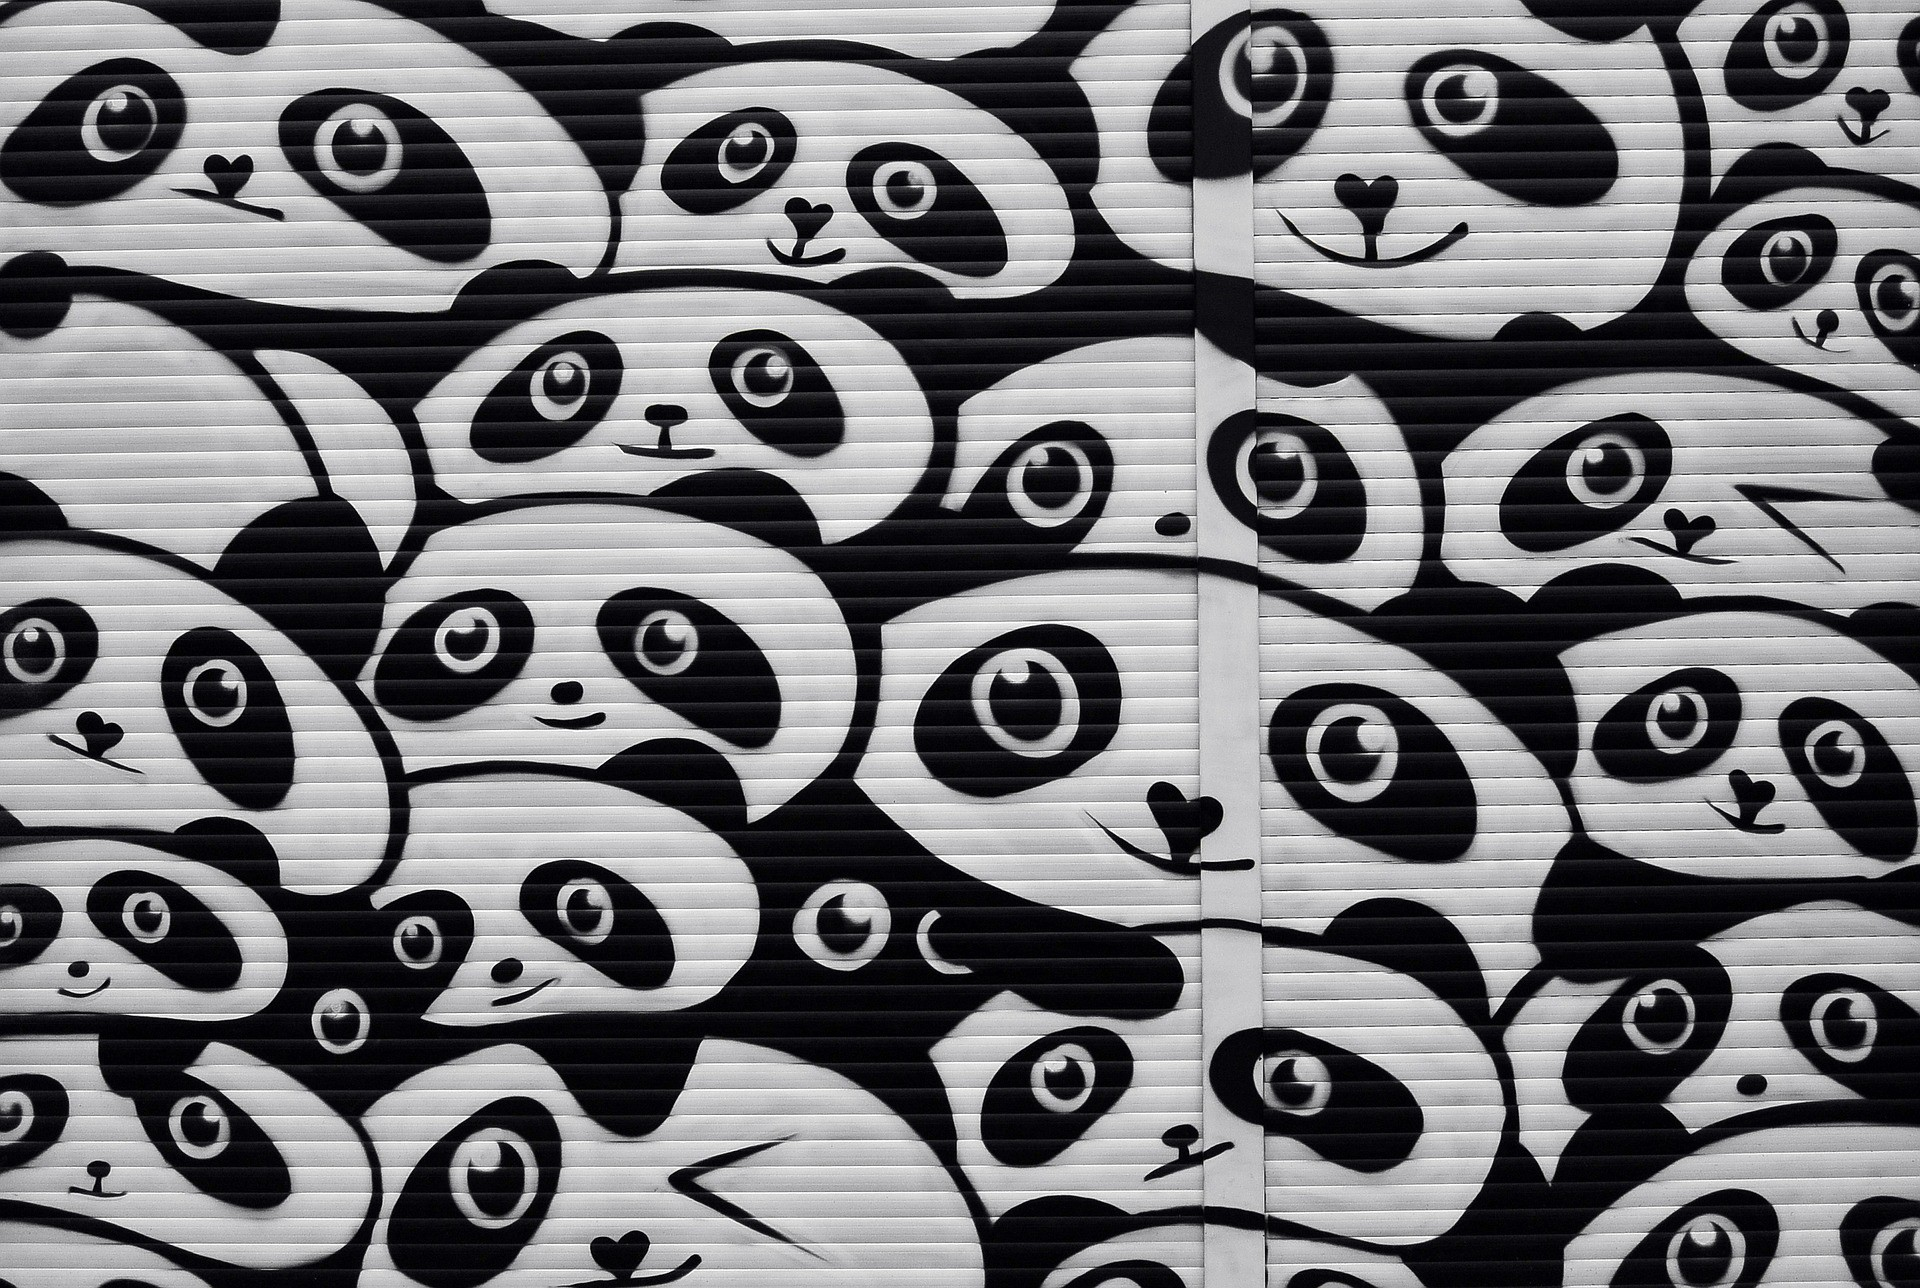

In [ ]:
df.tail

<bound method NDFrame.tail of       iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83441      ZWE    Africa  ...           61.49                   0.571
83442      ZWE    Africa  ...           61.49                   0.571
83443      ZWE    Africa  ...           61.49                   0.571
83444      ZWE    Africa  ...           61.49                   0.571
83445      ZWE    Africa  ...           61.49                   0.571

[83446 rows x 59 columns]>

In [ ]:
df.sort_values('location',ascending=False, inplace=True)
print(df.head)

<bound method NDFrame.head of       iso_code continent  ... life_expectancy human_development_index
83445      ZWE    Africa  ...           61.49                   0.571
83184      ZWE    Africa  ...           61.49                   0.571
83173      ZWE    Africa  ...           61.49                   0.571
83174      ZWE    Africa  ...           61.49                   0.571
83175      ZWE    Africa  ...           61.49                   0.571
...        ...       ...  ...             ...                     ...
287        AFG      Asia  ...           64.83                   0.511
288        AFG      Asia  ...           64.83                   0.511
289        AFG      Asia  ...           64.83                   0.511
213        AFG      Asia  ...           64.83                   0.511
0          AFG      Asia  ...           64.83                   0.511

[83446 rows x 59 columns]>


In [ ]:
df.sort_index(inplace=True)
print(df)

      iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83441      ZWE    Africa  ...           61.49                   0.571
83442      ZWE    Africa  ...           61.49                   0.571
83443      ZWE    Africa  ...           61.49                   0.571
83444      ZWE    Africa  ...           61.49                   0.571
83445      ZWE    Africa  ...           61.49                   0.571

[83446 rows x 59 columns]


In [ ]:
df.shape

(83446, 59)

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of       iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83441      ZWE    Africa  ...           61.49                   0.571
83442      ZWE    Africa  ...           61.49                   0.571
83443      ZWE    Africa  ...           61.49                   0.571
83444      ZWE    Africa  ...           61.49                   0.571
83445      ZWE    Africa  ...           61.49                   0.571

[83446 rows x 59 columns]>

s.isna()
When we want to filter “NULL” values in the data frame, this function will help. Let’s create another data frame with some NULL values in the name column. Note that we use None in Python for null objects.

In [ ]:
df.isna()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83441,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83442,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83443,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,

In [ ]:
df.isna

<bound method DataFrame.isna of       iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83441      ZWE    Africa  ...           61.49                   0.571
83442      ZWE    Africa  ...           61.49                   0.571
83443      ZWE    Africa  ...           61.49                   0.571
83444      ZWE    Africa  ...           61.49                   0.571
83445      ZWE    Africa  ...           61.49                   0.571

[83446 rows x 59 columns]>

the df.rename() function helped to rename the column headers.
Please note that it takes a dictionary as the parameter, where the keys are the old headers and the values are the new headers.

In [ ]:
df.rename(columns={'new_cases_smoothed': 'normal_cases', 'new_vaccinations_smoothed': 'vaccine_applied'})
print(df.head)
print(df.tail)

<bound method NDFrame.head of       iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
83441      ZWE    Africa  ...           61.49                   0.571
83442      ZWE    Africa  ...           61.49                   0.571
83443      ZWE    Africa  ...           61.49                   0.571
83444      ZWE    Africa  ...           61.49                   0.571
83445      ZWE    Africa  ...           61.49                   0.571

[83446 rows x 59 columns]>
<bound method NDFrame.tail of       iso_code continent  ... life_expectancy human_development_index
0 

In [ ]:
def sum_cols(row):
    return row['total_cases'] + row['new_cases']
df.apply(sum_cols, axis=1)

0            2.0
1            1.0
2            1.0
3            1.0
4            1.0
          ...   
83441    37803.0
83442    37967.0
83443    37891.0
83444    38085.0
83445    38056.0
Length: 83446, dtype: float64

HISTOGRAMS:
A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable 

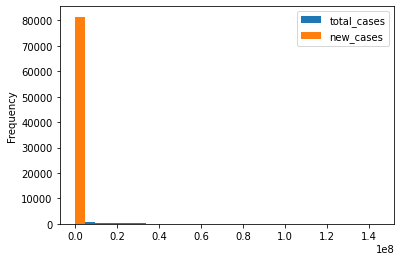

In [ ]:
df[["total_cases", "new_cases"]].plot(bins=30, kind="hist")

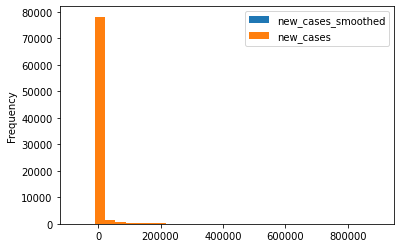

In [ ]:
df[["new_cases_smoothed", "new_cases"]].plot(bins=30, kind="hist")

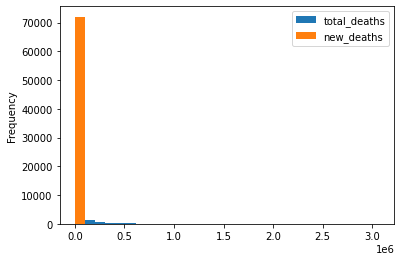

In [ ]:
df[["total_deaths", "new_deaths"]].plot(bins=30, kind="hist")

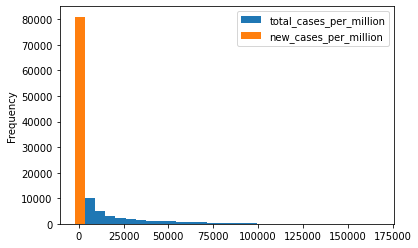

In [ ]:
df[["total_cases_per_million", "new_cases_per_million"]].plot(bins=30, kind="hist")

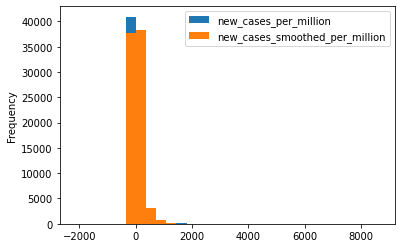

In [ ]:
df[['new_cases_per_million','new_cases_smoothed_per_million']].plot(bins=30,kind='hist')

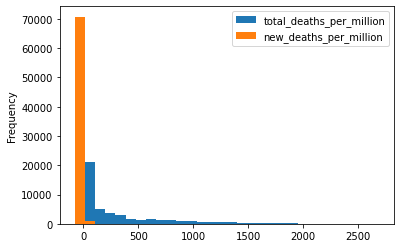

In [ ]:
df[['total_deaths_per_million','new_deaths_per_million']].plot(bins=30,kind='hist')

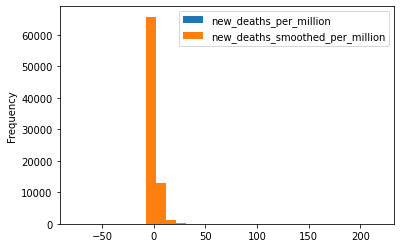

In [ ]:
df[['new_deaths_per_million','new_deaths_smoothed_per_million']].plot(bins=30,kind='hist')

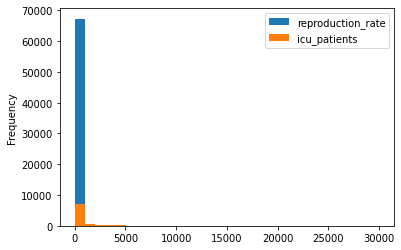

In [ ]:
df[['reproduction_rate','icu_patients']].plot(bins=30,kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa05ea5f810>,
      dtype=object)

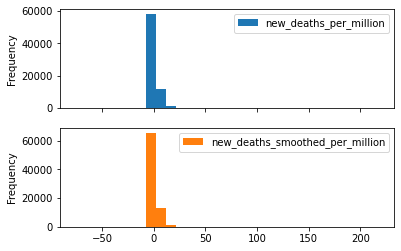

In [ ]:
df[['new_deaths_per_million','new_deaths_smoothed_per_million']].plot(bins=30, kind="hist", subplots=True)

 Plots for separate groups
Pandas enables us to visualize data separated by the value of the specified column. Separating data by certain columns and observing differences in distributions is a common step in Exploratory Data Analysis. Let’s separate distributions of a1 and a2 columns by the y2 column and plot histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa05e8ddc50>,
      dtype=object)

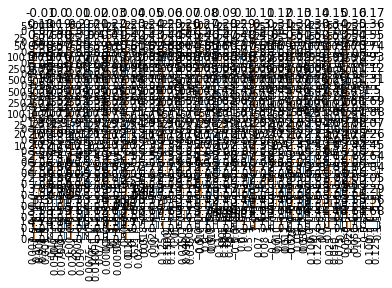

In [ ]:
df[['new_deaths_per_million','new_deaths_smoothed_per_million']].hist(by=df.reproduction_rate)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0588b1cd0>,
      dtype=object)

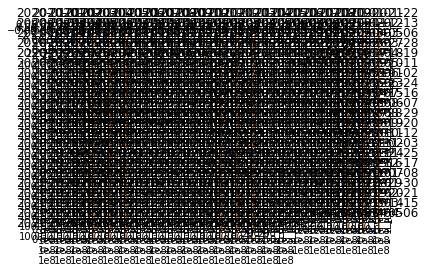

In [ ]:
df[['total_cases','total_deaths']].hist(by=df.date)